<blockquote>
    <h1>Exercise 3.10</h1>
    <p>This question should be answered using the <code>Carseats</code> data set.</p>
    <ol>
        <li>Fit a multiple regression model to predict $\mathrm{Sales}$ using $\mathrm{Price}$, $\mathrm{Urban}$, and $\mathrm{US}$.</li>
        <li>Provide an interpretation of each coefficient in the model. Be careful - some of the variables in the model are qualitative!</li>
        <li>Write out the model in equation form, being careful to handle the qualitative variables properly.</li>
        <li>For which of the predictors can you reject the null hypothesis $H_0:\beta_j = 0$?</li>
        <li>On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.</li>
        <li>How well do the models in 1 and 5 fit the data?</li>
        <li>Using the model from 5, obtain $95 \%%$ confidence intervals for the coefficient(s).</li>
        <li>Is there evidence of outliers or high leverage observations in the model from 5?</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/usefulFunctions.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import statsmodels.api as sm

<h2>Data Exploration</h2>
<p>We first read the comma-separated values (csv) <code>Carseats</code> file into a pandas DataFrame, for which we will show the top five rows.</p>

In [2]:
df = pd.read_csv("../../DataSets/Carseats/Carseats.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


<p>For this exercise, we are only interested in the $\mathrm{Sales}$, $\mathrm{Price}$, $\mathrm{Urban}$ and $\mathrm{US}$ variables. So we will <code>drop</code> all the other columns from the DataFrame, making use of our auxiliary <code>removeColumnsFromList()</code> function from the <a href="../../customModules/usefulFunctions.ipynb">usefulFunctions notebook</a>.</p>

In [3]:
columnsToKeep = ['Sales', 'Price', 'Urban', 'US']
columnsToDrop = removeColumnsFromList(df, columnsToKeep)
df.drop(columnsToDrop, axis=1, inplace=True)
df.head()
df.shape

,Sales,Price,Urban,US
0,9.50,120,Yes,Yes
1,11.22,83,Yes,Yes
2,10.06,80,Yes,Yes
3,7.40,97,Yes,Yes
4,4.15,128,Yes,No


(400, 4)

<p>We now plot the scatter matrix of the two quantative variable to quickly get some visual insight in the given data, with a histogram of each variable along the diagonal (more plots of the data, including the categorical variables, can be found in the <a href="../../DataSets/Carseats/Exploration.ipynb">Exploration notebook</a>).</p>

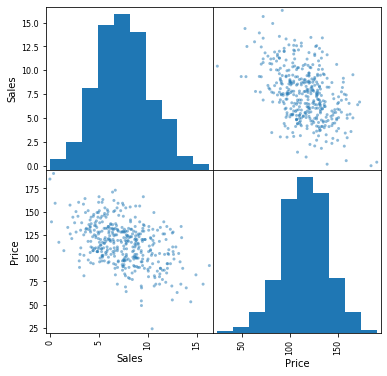

In [4]:
_ = pd.plotting.scatter_matrix(df, figsize=(6, 6))

<h3>Exercise 3.10.1</h3>
<blockquote>
    <i>Fit a multiple regression model to predict $\mathrm{Sales}$ using $\mathrm{Price}$, $\mathrm{Urban}$, and $\mathrm{US}$.</i>
</blockquote>

<p>Because $\mathrm{Urban}$ and $\mathrm{US}$ are both categorical variables (both with cardinality of 2), we must create two dummy variables for them, and then we can run our multiple regression just as we did for <a href="../Exercise9/3_9.ipynb">Exercise 3.9</a>.</p>

In [5]:
c_Urban = df['Urban'].astype('category')
df['Urban_dummy'] = c_Urban.cat.codes
d_Urban = dict(enumerate(c_Urban.cat.categories))
c_US = df['US'].astype('category')
df['US_dummy'] = c_US.cat.codes
d_US = dict(enumerate(c_US.cat.categories))
f'mapping for the Urban dummy variable: {d_Urban}'
f'mapping for the US dummy variable: {d_US}'
df.head(10)

"mapping for the Urban dummy variable: {0: 'No', 1: 'Yes'}"

"mapping for the US dummy variable: {0: 'No', 1: 'Yes'}"

,Sales,Price,Urban,US,Urban_dummy,US_dummy
0,9.50,120,Yes,Yes,1,1
1,11.22,83,Yes,Yes,1,1
2,10.06,80,Yes,Yes,1,1
3,7.40,97,Yes,Yes,1,1
4,4.15,128,Yes,No,1,0
5,10.81,72,No,Yes,0,1
6,6.63,108,Yes,No,1,0
7,11.85,120,Yes,Yes,1,1
8,6.54,124,No,No,0,0
9,4.69,124,No,Yes,0,1


In [6]:
df.insert(0, 'Intercept', 1)
targetColumn = ['Sales']
descriptiveColumns = removeColumnsFromList(df, targetColumn + ['Urban', 'US'])
X = df[descriptiveColumns]
Y = df[targetColumn]
model = sm.OLS(Y, X)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           2.39e-23
Time:                        22:09:42   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.0435      0.651     20.036      0.000      11.764      14.323
Price          -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_dummy    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_dummy        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3>Exercise 3.10.2</h3>
<blockquote>
    <i>Provide an interpretation of each coefficient in the model. Be careful - some of the variables in the model are qualitative!</i>
</blockquote>

<p>
    <ul>
        <li>Coefficient of $\mathrm{Intercept}$ is $13.04$: this can be interpreted as the average $\mathrm{Sales}$ when $\mathrm{Urban}=\mathrm{US}=\mathrm{"No"}$ and $\mathrm{Price}=0$</li>
        <li>Coefficient of $\mathrm{Price}$ is $-0.05$: when the $\mathrm{Price}$ increases by $1$, then the $\mathrm{Sales}$ variable decreases by $0.05$ (treating all the other independent variables constant).</li>
        <li>Coefficient of $\mathrm{Urban}$ is $-0.022$: this number can be interpreted as the average difference in $\mathrm{Sales}$ between living in an Urban area or not (treating all the other independent variables constant). Note that its $p$ value is very high, so likely not a significant relation.</li>
        <li>Coefficient of $\mathrm{US}$ is $1.20$: this number can be interpreted as the average difference in $\mathrm{Sales}$ between living in the US or not (treating all the other independent variables constant).</li>
    </ul>
</p>

<h3>Exercise 3.10.3</h3>
<blockquote>
    <i>Write out the model in equation form, being careful to handle the qualitative variables properly.</i>
</blockquote>

<p>From above we see that for both the $\mathrm{Urban}$ and $\mathrm{US}$ variables, the <code>"No"</code> string is mapped to the <code>0</code> int, and the <code>"Yes"</code> string is mapped to the <code>1</code> int, which results in 4 separate equations describing this linear model:
    <ul>
        <li>When $\mathrm{Urban}=\mathrm{US}=\mathrm{"No"}$:
        $$
            \mathrm{Sales} \approx 13.04 
                                - 0.05 * \mathrm{Price} 
        $$</li>   
        <li>When $\mathrm{Urban}=\mathrm{"Yes"}$ and $\mathrm{US}=\mathrm{"No"}$:
        $$
            \mathrm{Sales} \approx 13.04 
                                - 0.022 - 0.05 * \mathrm{Price} 
        $$</li>   
        <li>When $\mathrm{Urban}=\mathrm{"No"}$ and $\mathrm{US}=\mathrm{"Yes"}$:
        $$
            \mathrm{Sales} \approx 13.04
                                + 1.20 - 0.05 * \mathrm{Price} 
        $$</li>  
        <li>When $\mathrm{Urban}=\mathrm{US}=\mathrm{"Yes"}$:
        $$
            \mathrm{Sales} \approx 13.04
                                - 0.022 + 1.20 - 0.05 * \mathrm{Price} 
        $$</li>   
    </ul>
</p>

<h3>Exercise 3.10.4</h3>
<blockquote>
    <i>For which of the predictors can you reject the null hypothesis $H_0:\beta_j = 0$?</i>
</blockquote>

<p>We can reject the null hypothesis for the coefficients associated with the $\mathrm{Intercept}$, $\mathrm{Price}$ and $\mathrm{US}$</p>

<h3>Exercise 3.10.5</h3>
<blockquote>
    <i>On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.</i>
</blockquote>


In [7]:
targetColumn = ['Sales']
descriptiveColumns = removeColumnsFromList(df, targetColumn + ['Urban_dummy', 'Urban', 'US'])
X = df[descriptiveColumns]
Y = df[targetColumn]
model = sm.OLS(Y, X)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           2.66e-24
Time:                        22:09:42   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_dummy       1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3>Exercise 3.10.6</h3>
<blockquote>
    <i>How well do the models in 1 and 5 fit the data?</i>
</blockquote>

<p>We see that there is no difference in $R^2$, but the adjusted $R^2$ has increased by $1 \%$, indicating that this new model provided a small improvement compared to the previous model. The $F$-statistic has increased significantly, providing more evidence that the $\mathrm{Sales}$ variable is not related to the $\mathrm{Urban}$ variable.</p>

<h3>Exercise 3.10.7</h3>
<blockquote>
    <i>Is there evidence of outliers or high leverage observations in the model from 5?</i>
</blockquote>


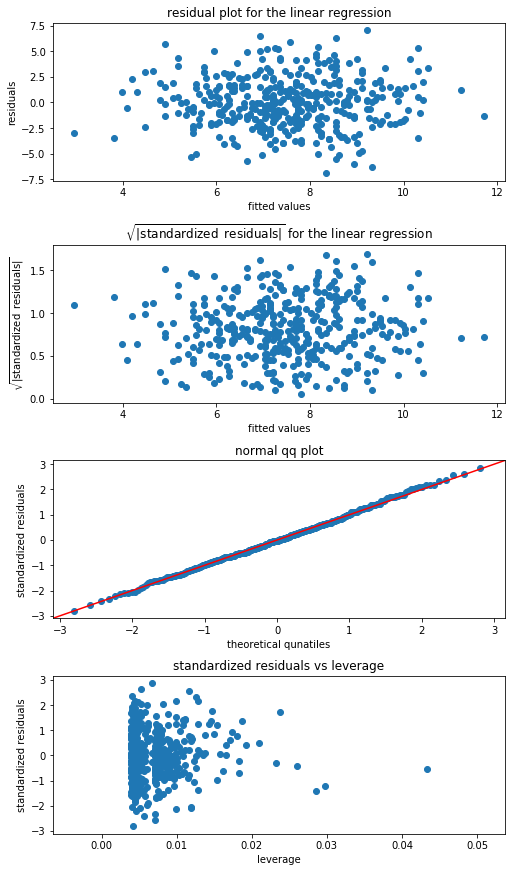

In [8]:
createResidualPlots(X, Y, fitted_model=fitted)

<p>The leverage plot shows that there are no outliers, however some sample points do have a high leverage.</p>